In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
diam = pd.read_csv("inputs/train.csv")

In [3]:
diam.isna().sum() #No null values
diam.shape

(40455, 11)

In [4]:
diam.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [5]:
diam.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [6]:
diam.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


Everything that I will transform, I will do it following this order: the worst value is 1, and all categories will follow this rule.

In [7]:
diam.carat.unique() #cathegorize: very_low, low, medium, high, very_high (1-5)
diam.carat.min(), diam.carat.max() #0.2 - 4.5

(0.2, 4.5)

In [8]:
diam.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [9]:
diam.color.unique()#J is worst, D is best. 

array(['F', 'E', 'D', 'H', 'G', 'J', 'I'], dtype=object)

In [10]:
 diam.clarity.unique()#(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

array(['VS2', 'SI1', 'VS1', 'SI2', 'VVS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [11]:
#diam.depth.unique()

In [12]:
#diam.table.unique()


In [13]:
diam.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.797150,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,11678.496907,0.472872,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,40454.000000,4.500000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


In [14]:
diam

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.32,Ideal,D,VS1,61.5,56.0,4.41,4.43,2.72,862
40451,40451,0.30,Ideal,D,VS2,60.9,57.0,4.32,4.35,2.64,710
40452,40452,0.47,Premium,G,SI1,62.7,58.0,4.97,4.99,3.12,931
40453,40453,0.40,Good,G,VS2,63.5,56.0,4.68,4.70,2.98,807


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diam["labcol"] = le.fit_transform(diam["color"])
diam["labcol"]

0        2
1        1
2        0
3        4
4        0
        ..
40450    0
40451    0
40452    3
40453    3
40454    4
Name: labcol, Length: 40455, dtype: int64

In [16]:
le = preprocessing.LabelEncoder()
diam["labcut"] = le.fit_transform(diam["cut"])
diam["labcut"]

0        4
1        2
2        4
3        3
4        4
        ..
40450    2
40451    2
40452    3
40453    1
40454    4
Name: labcut, Length: 40455, dtype: int64

In [17]:
le = preprocessing.LabelEncoder()
diam["labclar"] = le.fit_transform(diam["clarity"])
diam["labclar"]

0        5
1        2
2        2
3        4
4        2
        ..
40450    4
40451    5
40452    2
40453    5
40454    3
Name: labclar, Length: 40455, dtype: int64

In [18]:
diam

,id,carat,cut,color,clarity,depth,table,x,y,z,price,labcol,labcut,labclar
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.32,Ideal,D,VS1,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,40451,0.30,Ideal,D,VS2,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,40452,0.47,Premium,G,SI1,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,40453,0.40,Good,G,VS2,63.5,56.0,4.68,4.70,2.98,807,3,1,5


In [19]:
diam.drop(["id", "cut", "color", "clarity"], axis=1, inplace = True)

In [20]:
diam

,carat,depth,table,x,y,z,price,labcol,labcut,labclar
0,0.30,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,0.34,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,0.40,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,0.30,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,0.40,63.5,56.0,4.68,4.70,2.98,807,3,1,5


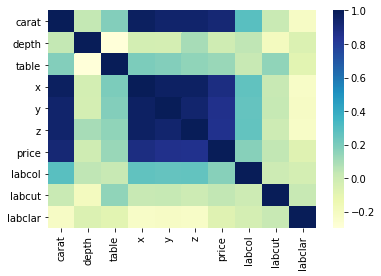

In [21]:
correldiam = diam.corr()
sns.heatmap(correldiam, cmap="YlGnBu")

In [22]:
diammoreV = diam
diammoreV


,carat,depth,table,x,y,z,price,labcol,labcut,labclar
0,0.30,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,0.34,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,0.40,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,0.30,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,0.40,63.5,56.0,4.68,4.70,2.98,807,3,1,5


In [23]:
diam = diam.drop(["labcut", "labclar"], axis=1)


In [24]:
diam.to_csv("outputs/diamall.csv", index = False)

In [25]:
import numpy as np
from scipy import stats
diam_noout = diam[(np.abs(stats.zscore(diam)) < 3).all(axis=1)]

In [26]:
diam_noout

,carat,depth,table,x,y,z,price,labcol
0,0.30,62.8,56.0,4.29,4.31,2.70,605,2
1,0.34,62.6,55.0,4.46,4.49,2.80,565,1
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0
3,0.40,61.8,59.2,4.72,4.74,2.92,793,4
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0
...,...,...,...,...,...,...,...,...
40450,0.32,61.5,56.0,4.41,4.43,2.72,862,0
40451,0.30,60.9,57.0,4.32,4.35,2.64,710,0
40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3
40453,0.40,63.5,56.0,4.68,4.70,2.98,807,3


In [27]:
diam_noout.to_csv("outputs/diam_no_out.csv",index = False)
diam.to_csv("outputs/diam.csv", index = False)
diammoreV.to_csv("outputs/diammoreV.csv", index = False)

## FINALLY, WITH GET_DUMMIES

In [36]:
gdum = pd.read_csv("inputs/train.csv")

In [37]:
#gdum

In [38]:
gdum = pd.get_dummies(gdum)

In [39]:
gdum.drop(["id", "depth"], axis=1, inplace = True)


In [40]:
predgdum = pd.read_csv("inputs/predict.csv")


In [41]:
predgdum = pd.get_dummies(predgdum)

In [42]:
predgdum

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,2.36,60.8,54.0,8.68,8.57,5.24,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,1,2.04,62.0,56.0,8.18,8.23,5.09,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0.51,61.7,54.0,5.18,5.19,3.20,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,3,0.30,61.3,56.0,4.32,4.33,2.65,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,4,0.96,68.8,56.0,6.11,5.98,4.16,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.53,60.8,59.0,5.23,5.17,3.16,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13481,13481,1.01,62.8,60.0,6.32,6.38,3.99,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13482,13482,0.92,60.7,58.0,6.29,6.26,3.81,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13483,13483,0.39,62.0,54.0,4.70,4.72,2.92,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
predgdum.drop(["id", "depth"], axis=1, inplace = True)

In [44]:
predgdum

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.36,54.0,8.68,8.57,5.24,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2.04,56.0,8.18,8.23,5.09,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.51,54.0,5.18,5.19,3.20,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.30,56.0,4.32,4.33,2.65,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.96,56.0,6.11,5.98,4.16,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.53,59.0,5.23,5.17,3.16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13481,1.01,60.0,6.32,6.38,3.99,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
13482,0.92,58.0,6.29,6.26,3.81,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
13483,0.39,54.0,4.70,4.72,2.92,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
gdum.to_csv("outputs/gdum.csv", index = False)
predgdum.to_csv("outputs/predgdum.csv", index = False)

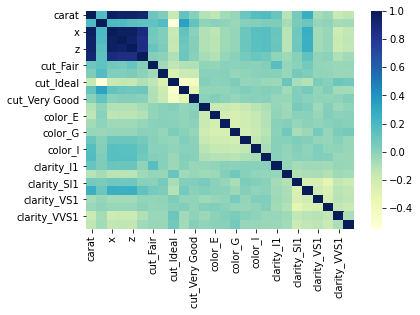

In [46]:
CORR = gdum.corr()
sns.heatmap(CORR, cmap = "YlGnBu")